# Linear Regression
- Univariate from scratch
- Using SKlearn
- Multivariate from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [6]:
X, y, coef = make_regression(n_samples=500, n_features=1, bias=3.7, noise=7.3, coef=True)
print(X.shape, y.shape)
print(coef)

(500, 1) (500,)
42.706086858209346


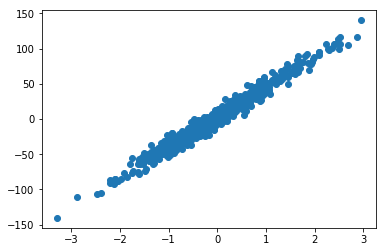

In [7]:
plt.figure()
plt.scatter(X, y)
plt.show()

# Univariate Linear Regression

In [136]:
class UnivariateLinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.slope = np.random.uniform(low=-1, high=1)
        self.intercept = np.random.random()
        
    def hypothesis(self, x):
        return self.slope * x + self.intercept
        
    def apply_gradient_descent(self, learning_rate=0.1):
        dldw0 = 0
        dldw1 = 0
        
        # Compute Gradients
        for x,y in zip(self.X, self.y):
            grad_00 = (self.hypothesis(x) - y)
            grad_01 = (self.hypothesis(x) - y) * x
            dldw0 += grad_00
            dldw1 += grad_01
            
        dldw0 /= self.X.shape[0]
        dldw1 /= self.X.shape[0]
        
        # Update Weights
        self.slope = self.slope - (learning_rate * dldw1)
        self.intercept = self.intercept - (learning_rate * dldw0)
        
    
    def compute_loss(self):
        losses = []
        for x,y in zip(self.X, self.y):
#         for i in range(self.X.shape[0]):
#             x = self.X[i]
#             y = self.y[i]
            loss = (y - self.hypothesis(x))**2
            losses.append(loss)
            
        losses = np.array(losses)
        return losses.sum() / 2 * self.X.shape[0]
    
    def run(self, losses, iterations=1):
        for _ in range(iterations):
            losses.append(self.compute_loss())
            self.apply_gradient_descent()
        print(losses)
        return losses

In [137]:
uni_lin_reg = UnivariateLinearRegression(X, y)

In [138]:
def plot_regression(uni_lin_reg):
    # Get Predictions
    yhat = []
    for x in uni_lin_reg.X:
        yhat.append(uni_lin_reg.hypothesis(x))

    yhat = np.array(yhat)

    # Scatter Plot
    plt.figure()
    plt.scatter(uni_lin_reg.X, uni_lin_reg.y)
    plt.plot(uni_lin_reg.X, yhat, 'r')
    plt.show()

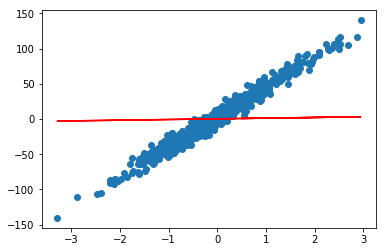

In [139]:
losses = [uni_lin_reg.compute_loss()]
plot_regression(uni_lin_reg) # Initial case

[238974302.02848035, 238974302.02848035, 192212560.04717332, 154867889.21294048, 125043841.14770715, 101225882.02231951, 82204481.03843656, 67013687.66746562, 54882078.457084484, 45193582.371071674, 37456195.28287386, 31276994.872763004, 26342187.12746088, 22401171.157485593, 19253813.106915075, 16740282.895374231, 14732937.678582462, 13129839.85088451, 11849580.418997819, 10827144.865968842, 10010611.56438608, 9358515.0766677, 8837740.444739407, 8421841.536282834, 8089698.04930445, 7824442.974624793, 7612606.050363691, 7443429.711068593, 7308322.793808102, 7200424.25916876, 7114254.771903359, 7045438.447694306, 6990480.635692501, 6946590.452117822, 6911539.052769227, 6883546.447196566, 6861191.1066974485, 6843337.775825397, 6829079.821511687, 6817693.1921567535, 6808599.648628013, 6801337.399949629, 6795537.652497113, 6790905.88181092, 6787206.875968788, 6784252.790984818, 6781893.611661117, 6780009.533472074, 6778504.8786159055, 6777303.23727657, 6776343.5873582065]


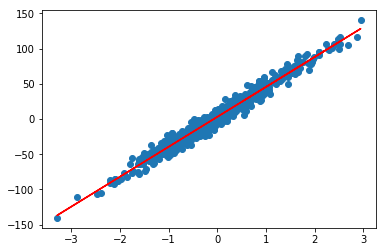

In [140]:
losses = uni_lin_reg.run(losses, 50)
plot_regression(uni_lin_reg)

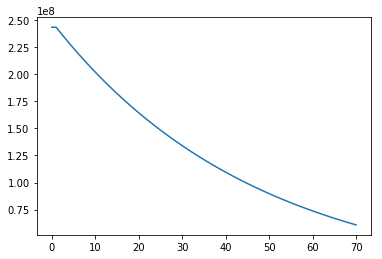

In [121]:
# Plotting Loss
plt.figure()
plt.plot(losses)
plt.show()

# SKLearn

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [123]:
boston = load_boston()

In [125]:
boston.data.shape

(506, 13)

In [126]:
boston.target.shape

(506,)

In [129]:
# boston.feature_names
# boston.DESCR

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [132]:
sk_linreg = LinearRegression()

In [133]:
sk_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
print("Train: ", sk_linreg.score(X_train, y_train))
print("Test: ", sk_linreg.score(X_test, y_test))

Train:  0.7730029305614315
Test:  0.621992973792902


# Multivariate Linear Regression

In [217]:
class MultivariateLinearRegression:
    def __init__(self, X, y):
        self.X = ((X - X.mean(axis=0)) / X.std(axis=0))
        self.y = y
        self.coef = np.random.uniform(low=-1, high=1, size=(self.X.shape[1],))
        self.intercept = np.random.random()
        
                
    def hypothesis(self, x):
        return self.coef.dot(x) + self.intercept
        
    def apply_gradient_descent(self, learning_rate=0.1):
        gradients = np.zeros_like(self.coef)
        grad_00 = 0
        
        # Get predictions
        yhat = []
        for x in self.X:
            yhat.append(self.hypothesis(x))
        yhat = np.array(yhat) # (Dim,)
        
        # Compute Gradients
        for j in range(self.X.shape[1]):
            grad = (yhat - self.y) * (self.X[:, j])
            gradients[j] = grad.sum() / self.X.shape[0]
            
        grad_00 = (yhat - self.y).sum() / self.X.shape[0]
            
        # Update Weights
        self.coef = self.coef - (learning_rate * gradients)
        self.intercept = self.intercept - (learning_rate * grad_00)
        
    
    def compute_loss(self):
        losses = []
        for x,y in zip(self.X, self.y):
            loss = (y - self.hypothesis(x))**2
            losses.append(loss)
            
        losses = np.array(losses)
        return losses.sum() / 2 * self.X.shape[0]
    
    def run(self, losses, iterations=1):
        for _ in range(iterations):
            losses.append(self.compute_loss())
            self.apply_gradient_descent()
        print(losses[:10])
        return losses

In [218]:
multi_lin_reg = MultivariateLinearRegression(X_train, y_train)

In [216]:
X_train[0].dot( multi_lin_reg.coef)

-197.209694239944

In [219]:
losses = [multi_lin_reg.compute_loss()]

In [220]:
losses = multi_lin_reg.run(losses, 200)

[52364456.17875893, 52364456.17875893, 40732022.814276956, 32978562.448119693, 26985985.00086939, 22198555.91166464, 18346818.40127415, 15242044.625895606, 12737192.443593081, 10714996.136001946]


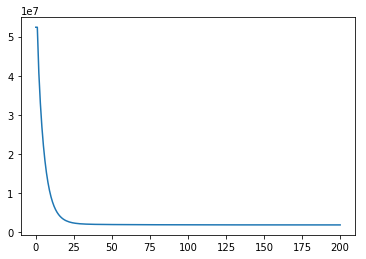

In [222]:
# Plotting Loss
plt.figure()
plt.plot(losses)
plt.show()

In [223]:
print(multi_lin_reg.coef)

[-0.90364603  1.04345499 -0.00901015  0.51083024 -2.02065935  3.16777466
 -0.24153109 -3.36900043  2.05520053 -1.56423604 -2.05884764  0.83952688
 -3.42325816]


In [224]:
print(multi_lin_reg.intercept)

22.91831681554857
